In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'polya'
go_gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


## Lengths of TSSs and TESs

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
101
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318
101


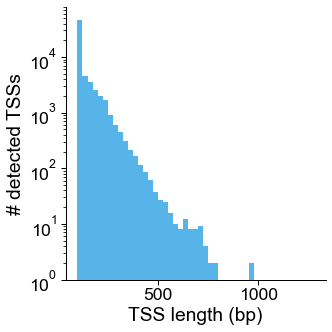

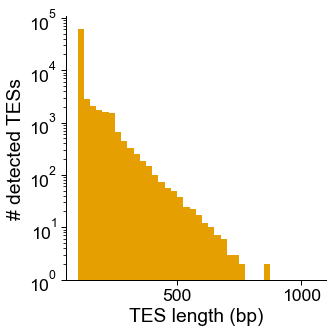

In [3]:
plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tss',
                   gene_subset,
                   min_tpm,
                   'figures/tss_len_hist.pdf')
plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tes',
                   gene_subset,
                   min_tpm,
                   'figures/tes_len_hist.pdf')

## Upset plots for detected triplet features

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2033: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2032: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
Calculating tes TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318


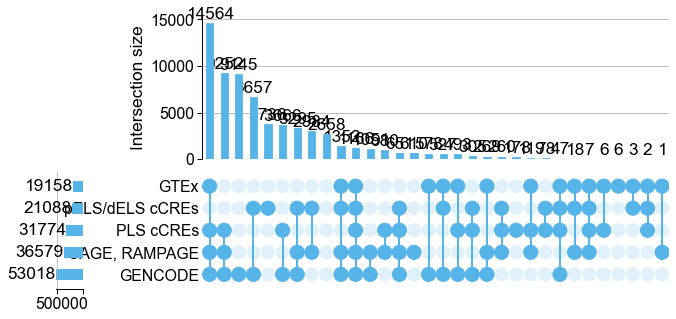

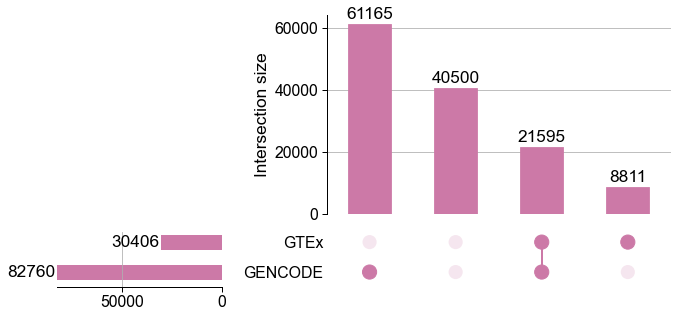

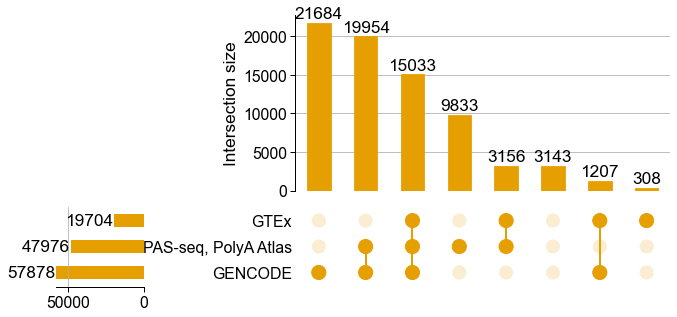

In [3]:
for feat in ['tss', 'ic', 'tes']:
    fname = f'figures/{feat}_upset.pdf'
    make_triplet_feat_upset(cerberus_h5,
                            filt_ab,
                            feat,
                            gene_subset,
                            min_tpm,
                            fname)

## Intron chains by novelty type

Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
     novelty  counts
0        ISM   11184
1      Known   82760
2        NIC   21287
3        NNC   15381
4  Unspliced    1459
Number of complete intron chains: counts    132071
dtype: int64


<Figure size 216x288 with 0 Axes>

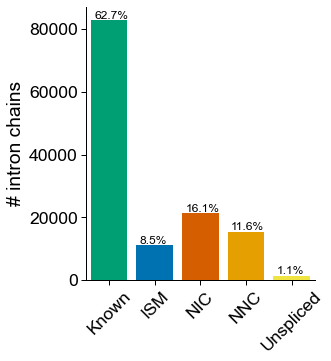

<Figure size 432x288 with 0 Axes>

In [4]:
df = pd.read_csv(filt_ab, sep='\t')
df, ic_ids = get_tpm_table(df,
               how='ic',
               gene_subset=gene_subset,
               min_tpm=min_tpm)
plot_ic_novelty(cerberus_h5, 
                source='lapa', 
                oprefix='figures/human',
                pass_list=ic_ids)

## # Isoforms detected per gene by biotype

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
figures//isos_per_gene_support.png


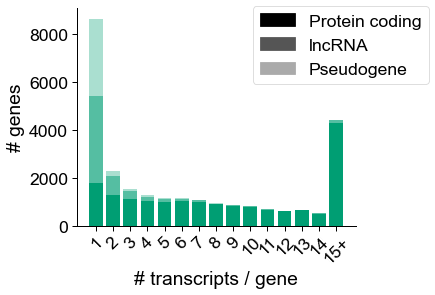

In [3]:
df = pd.read_csv(filt_ab, sep='\t')
_, ids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)
df = plot_n_isos_per_gene(df,
                     show_pc=True,
                     subset=ids,
                     max_isos=15, opref='figures/')

## # TSSs or TESs detected per IC

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806


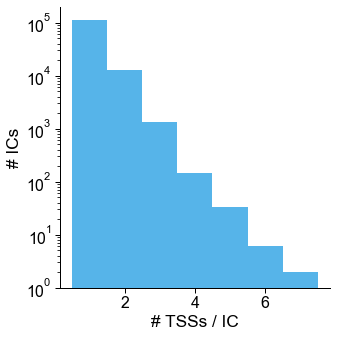

In [4]:
# tss / ic in detected transcripts
ca = cerberus.read(cerberus_h5)
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tss'
fname = 'figures/tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806


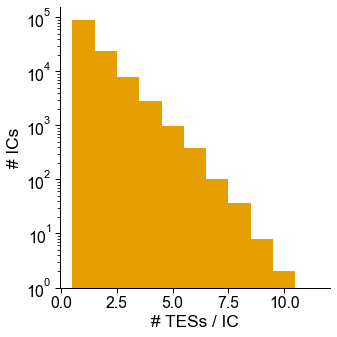

In [5]:
# tes / ic in detected transcripts
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tes'
fname = 'figures/tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

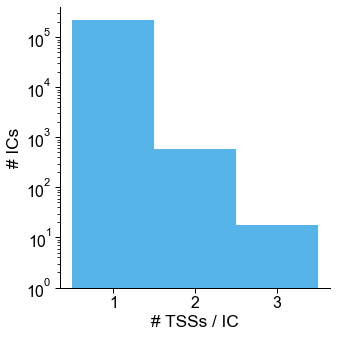

In [6]:
# gencode v40 tss / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tss'
fname = 'figures/v40_tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

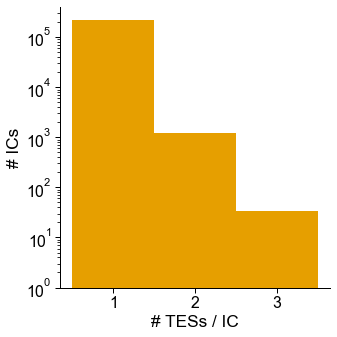

In [7]:
# gencode v40 tes / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tes'
fname = 'figures/v40_tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)